In [13]:
import os
import mediapipe as mp
import pandas as pd
import networkx as nx
import pickle
import numpy as np
import shutil
import matplotlib.pyplot as plt
from pandas.core.common import flatten
import numpy as np
import glob
from tqdm import tqdm
from pathlib import Path
import json
import random


In [14]:
def data_json(dataset_path):
    dataset = []
    # iterate through all folders in the directory
    for folder in glob.glob(dataset_path + '/*'):
        for files in glob.glob(folder + '/*'):
            # check if the file is either a folder or a json file
            if os.path.isdir(files):
                for data_path in glob.glob(files + '/*'):
                    dataset.append(glob.glob(data_path + '/*.json'))
            elif files.endswith('.json'):
                dataset.append(files)
    dataset = list(flatten(dataset))
    print("Total json files:", len(dataset))
    return dataset

In [15]:
def sort_by_key(data,key):
    dataset = []
    for i in data:
        f = open(i)
        json_data = json.load(f)
        if key in json_data:
            dataset.append(i)
        else:
            continue
    print("Json with annotazione1 present:",len(dataset))
    return dataset

In [16]:

def get_relevant_label(data,classes_relevant,key):
    label = []
    dataset = []
    for j in data:
        f = open(j)
        json_data = json.load(f)
        if json_data[key] in classes_relevant:
            dataset.append(j)
            label.append(json_data[key])
            
    print("Number of relevant data:",len(dataset))
    print("Label:",len(label))
    return label,dataset



In [17]:
def data_png(dataset_path):
    dataset = []
    # iterate through all folders in the directory
    for folder in glob.glob(dataset_path + '/*'):
        for files in glob.glob(folder + '/*'):
            # check if the file is either a folder or a json file
            if os.path.isdir(files):
                for data_path in glob.glob(files + '/*'):
                    dataset.append(glob.glob(data_path + '/*.png'))
            elif files.endswith('.png'):
                dataset.append(files)
    dataset = list(flatten(dataset))
    print("Total json files:", len(dataset))
    return dataset

In [18]:
def create_data(png_list, relevant_json):

    relevant_png = []
    
    List = []
    
    for a in relevant_json:
        a1=Path(a).stem
        List.append(a1)
        
    for a in png_list:
        if Path(a).stem in List:
           relevant_png.append(a)
 
    print("Number of relevant Pngs:", len(relevant_png))           
 
    return relevant_png


In [19]:
classes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
classes_relevant = [5,6,7,8,9,10,11,12,14,16]
classes_irrelevant = [0,1,2,3,4,15,17]
labels_of_interest = ['relevant','ir-relevant']
image_path = 'ricordi'
key = "annotazione1" 

In [20]:
json_list = data_json(image_path)
png_list = data_png(image_path)
sorted_list_by_key = sort_by_key(json_list,key)
relevant_label, relevant_json= get_relevant_label(sorted_list_by_key,classes_relevant,key)

relevant_png = create_data(png_list, relevant_json)



Total json files: 276221
Total json files: 276095
Json with annotazione1 present: 115965
Number of relevant data: 15491
Label: 15491
Number of relevant Pngs: 15491


In [21]:
def plot_distribution_by_class(sorted_list_by_key, classes, key):
    count = [0] * len(classes)  # Initialize count list with zeros
    
    for i in sorted_list_by_key:
        with open(i) as f:
            json_data = json.load(f)
            class_index = json_data[key]
            count[class_index] += 1
    
    print(count)
    
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    
    x = np.arange(len(classes))  # Generate an array of class indices
    plt.bar(x, count)
    plt.xticks(x, classes)  # Set custom x-axis tick positions and labels
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.title("Class Count")
    plt.show()


In [22]:
def plot_distribution_by_relevant(num_r, num_ir):
    names = ['relevant', 'irrelevant']
    bar_list = [num_r, num_ir]
    plt.rcParams["figure.figsize"] = (8,10.5)
    plt.rcParams.update({'font.size': 35})
    plt.bar(names, bar_list, width = .5)
    plt.xticks(names)
    plt.yticks(bar_list)
    plt.xlabel('Dataset', fontsize=35)
    plt.ylabel('Distribution', fontsize=35)
    plt.show()


[62250, 9085, 7901, 4096, 9960, 143, 1460, 2353, 455, 293, 1482, 3277, 440, 0, 4814, 871, 774, 6311]


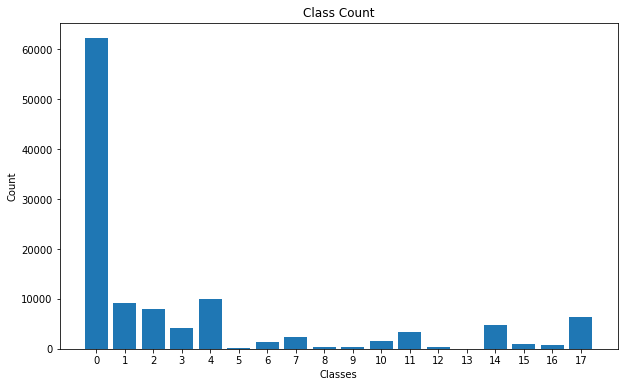

Number of irrelevant pngs: 100474


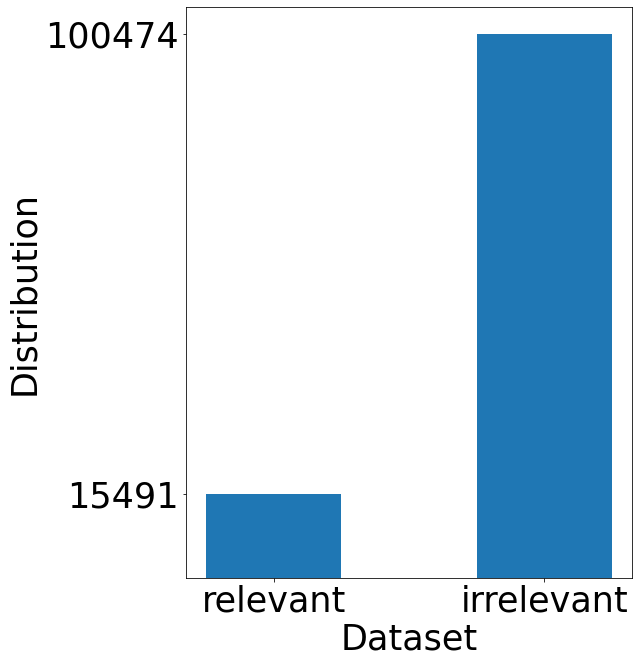

In [23]:
plot_distribution_by_class(sorted_list_by_key,classes,key)
num_ir = len(sorted_list_by_key) - len(relevant_png)
print("Number of irrelevant pngs:",num_ir)
plot_distribution_by_relevant(len(relevant_png), num_ir)

In [10]:

for label in classes_irrelevant:
    folder_name = str(label)
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)
  
    for json_path in sorted_list_by_key:
            with open(json_path) as f:
                data = json.load(f)
                if data[key] == label:
                    basename = os.path.splitext(os.path.basename(json_path))[0]
                    png_path = os.path.join(os.path.dirname(json_path), basename + ".png")
                    if os.path.exists(png_path):
                        shutil.copy(png_path, folder_name)


In [20]:
source_dataset_path = "./0"  # Replace with the path to the source dataset
destination_folder_path = "00"  # Replace with the desired path for the destination folder

if not os.path.exists(destination_folder_path):
    os.mkdir(destination_folder_path)
    
# Get the list of files in the source dataset
file_list = os.listdir(source_dataset_path)

num_files = len(os.listdir("./4"))
print(num_files)

# Randomly select num_files from the file list
selected_files = random.sample(file_list, num_files)

# Copy the selected files to the destination folder
for file_name in selected_files:
    source_file_path = os.path.join(source_dataset_path, file_name)
    destination_file_path = os.path.join(destination_folder_path, file_name)
    shutil.copy2(source_file_path, destination_file_path)

print("Selected files copied to the destination folder.")

9960
Selected files copied to the destination folder.


In [12]:
folder_path = "./binary_Dataset/Sub-Sample Irrelevant"  # Replace with the actual path to the folder
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
# Get the list of files in the folder
file_list = os.listdir(folder_path)
count = [0] * len(classes)  # Initialize count list with zeros

for f in file_list:
    basename = os.path.splitext(os.path.basename(f))[0]
        
    for i in sorted_list_by_key:
        jsonname = os.path.splitext(os.path.basename(i))[0]
        
        if basename == jsonname:
            with open(i) as f:
                json_data = json.load(f)
                class_index = json_data[key]
                count[class_index] += 1
                
# Count the number of files
print
print("Number of files in the folder:", num_files)


Number of files in the folder: 15491


In [11]:
count = 0

for label in labels_of_interest:
    folder_name = str(label)
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)
    
    if label == 'relevant':
        for json_path in sorted_list_by_key:
            with open(json_path) as f:
                data = json.load(f)
                if data[key] in classes_relevant:
                    basename = os.path.splitext(os.path.basename(json_path))[0]
                    png_path = os.path.join(os.path.dirname(json_path), basename + ".png")
                    if os.path.exists(png_path):
                        shutil.copy(png_path, folder_name)
    
    else :

        for label in classes_irrelevant:


            samples_count = 0
            for json_path in sorted_list_by_key:
                with open(json_path) as f:
                    data = json.load(f)
                    if data[key] == int(label):
                        basename = os.path.splitext(os.path.basename(json_path))[0]
                        png_path = os.path.join(os.path.dirname(json_path), basename + ".png")
                        if os.path.exists(png_path):
                            shutil.copy(png_path, folder_name)
                            samples_count += 1

                if samples_count >= 2582:
                    break




In [11]:
import os
import random

# Set the path to the folder you want to clean up
path_to_folder = "./0"

# Set the number of files you want to keep
num_files_to_keep = 9960

# Get a list of all files in the folder
files = [os.path.join(path_to_folder, f) for f in os.listdir(path_to_folder)]
files = [f for f in files if os.path.isfile(f)]

# Randomly select num_files_to_keep files to keep
files_to_keep = random.sample(files, num_files_to_keep)

# Delete all files except the files selected to keep
for f in files:
    if f not in files_to_keep:
        os.remove(f)


In [24]:
import random

# Define the classes and the maximum number of samples per class
max_samples_per_class = 2437

# Shuffle the list of JSON paths
random.shuffle(sorted_list_by_key)

# Create the folders and assign the samples
for label in classes_irrelevant:
    folder_name = str(label)
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)

    samples_count = 0
    for json_path in sorted_list_by_key:
        with open(json_path) as f:
            data = json.load(f)
            if data[key] == int(label):
                basename = os.path.splitext(os.path.basename(json_path))[0]
                png_path = os.path.join(os.path.dirname(json_path), basename + ".png")
                if os.path.exists(png_path):
                    shutil.copy(png_path, folder_name)
                    samples_count += 1

        if samples_count >= max_samples_per_class:
            break


In [5]:
import os
import shutil

def delete_smallest_folder(directory):
    # Get a list of all folders in the directory
    folders = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]

    if len(folders) == 0:
        print("No folders found in the directory.")
        return

    # Get the folder with the smallest number of files
    smallest_folder = min(folders, key=lambda folder: len(os.listdir(os.path.join(directory, folder))))

    # Delete the smallest folder
    folder_path = os.path.join(directory, smallest_folder)
    shutil.rmtree(folder_path)
    print(f"Deleted the folder: {smallest_folder}")

# Specify the directory containing the folders
directory_path = './only_relevant_dataset'

delete_smallest_folder(directory_path)




Deleted the folder: 8
